(Defining latex commands: not to be shown...)
$$
\newcommand{\norm}[1]{\left \| #1 \right \|}
\DeclareMathOperator{\minimize}{minimize}
\DeclareMathOperator{\maximize}{maximize}
\newcommand{\real}{\mathbb{R}}
\newcommand{\blasso}{\beta^{\mathrm{LASSO}}}
\newcommand{\bzero}{\beta^0}
\newcommand{\bLS}{\hat{\beta}^{\mathrm{LS}}}
$$

# Weight shrinkage competition

In this competition you will work on a real world dataset. The objective is to try and predict weight of some person using historical data collected over several years.

The competition is hosted on [Kaggle website](https://inclass.kaggle.com/c/weightshrinkage). This competition is by invitiation only, we will send out invitations to all emails registered on the Google mailing list. You can participate in groups of two or individually, Kaggle will help you how to participate in groups.

In order to get a full mark for this competition you should get pass the benchmark evaluation. In this sheet you will get an idea how to do that.

# Interploation techniques

The dataset you will be working with is an instance of a time series. Time series are different from what you may typically see in Machine Learning problems. The most important distinction between a time series and other datasets is that data points are no longer iid (**i**ndependently and **i**dentically **d**istributed).

Analysis of time series is a rich field of study. Here we show you one very simple method to work with time series. The dataset you download from the website contains many NA (**N**ot **A**ssigned) values. These missing values arise naturally in many datasets. Sometimes measurements are not made for every record or sometimes the data is corrupted. In this case, most NA values are cases where no measurement was made.

Since the dataset is a time series one simple approach is to fill in the NA values with neighboring values. This works particularly well when missing values are scattered and there are no missing values in long continuous ranges. Unfortunately our dataset suffers from this issue but we will use this technique as a first step. Feel free to use other methods to improve your result. Our objective is to fill in missing values for the *Weight* vector which is our target variable via interpolation.

## Interpolation in Python

You can do interpolation in Python using many different packages. Here we use [Pandas](http://pandas.pydata.org/) which is a common library for data analysis. The difference between Pandas and Numpy is the way data is layed out in memory which makes many operations efficient and easy.

As usual we start with loading the package:

In [68]:
import pandas as pd

Pandas provide similar, and sometimes more advanced, functionalities for loading different kinds of data. One if its particular strength is in working with time series data.

In [76]:
data = pd.read_csv("./datasets/kag_train.csv",index_col='Date',parse_dates='Date')
data[400:410]

ID  FoodWeight  Weight  Calories  Proteins  Lipids  \
Date                                                              
2013-06-11  401       30.92    91.3      2107       156      43   
2013-06-12  402       30.31    91.4      2057       125      40   
2013-06-13  403       34.11    91.2      2151       119      33   
2013-06-14  404         NaN    91.7       NaN       NaN     NaN   
2013-06-15  405       28.95     NaN      2418       160      47   
2013-06-16  406         NaN    91.8       NaN       NaN     NaN   
2013-06-17  407       31.00    92.6      2211       171      49   
2013-06-18  408       36.42     NaN      2274       167      23   
2013-06-19  409       38.14    91.9      2274       137      33   
2013-06-20  410         NaN    91.7       NaN       NaN     NaN   

            Carbohydrates  Remarks  
Date                                
2013-06-11            270      NaN  
2013-06-12            293      NaN  
2013-06-13            341      NaN  
2013-06-14            NaN  VisitTo  
2013-06-15            311      NaN  
2013-06-16            NaN  VisitTo  
2013-06-17            264      NaN  
2013-06-18            342      NaN  
2013-06-19            346      NaN  
2013-06-20            NaN  VisitTo

This line loads the data, treats *Date* field in the dataset as Datetime and sets *Date* column as the index of the loaded Table. The standard data structure in Pandas is *Dataframe*, a dataframe contains several *Series* with the same index. If the index is a time series Panda will automatically constructs appropriate indexing. Also note that Pandas detects NA values automatically.

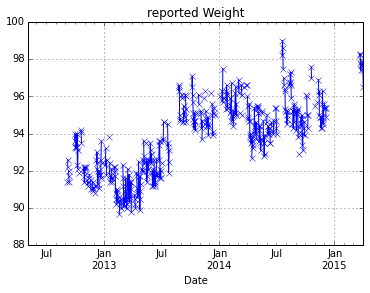

In [77]:
%matplotlib inline
data['Weight'].plot(marker = 'x',title='reported Weight')

Next, we would like to perform interpolation for missing values in the *Weight* column. To do so we first select the column we would like to make the interpolation for and then apply the $\texttt{interpolate}$ function on the Series we selected.

In [78]:
data['WeightInter'] = data['Weight'].interpolate()
data[400:410]

ID  FoodWeight  Weight  Calories  Proteins  Lipids  \
Date                                                              
2013-06-11  401       30.92    91.3      2107       156      43   
2013-06-12  402       30.31    91.4      2057       125      40   
2013-06-13  403       34.11    91.2      2151       119      33   
2013-06-14  404         NaN    91.7       NaN       NaN     NaN   
2013-06-15  405       28.95     NaN      2418       160      47   
2013-06-16  406         NaN    91.8       NaN       NaN     NaN   
2013-06-17  407       31.00    92.6      2211       171      49   
2013-06-18  408       36.42     NaN      2274       167      23   
2013-06-19  409       38.14    91.9      2274       137      33   
2013-06-20  410         NaN    91.7       NaN       NaN     NaN   

            Carbohydrates  Remarks  WeightInter  
Date                                             
2013-06-11            270      NaN        91.30  
2013-06-12            293      NaN        91.40  
2013-06-13            341      NaN        91.20  
2013-06-14            NaN  VisitTo        91.70  
2013-06-15            311      NaN        91.75  
2013-06-16            NaN  VisitTo        91.80  
2013-06-17            264      NaN        92.60  
2013-06-18            342      NaN        92.25  
2013-06-19            346      NaN        91.90  
2013-06-20            NaN  VisitTo        91.70

Comparing the values in *Weight* and *WeightInter* we can see pandas used a linear interpolation to fill in null values in our dataset. We can now store the results and make a submission on Kaggle.

# Kaggle submission

In order to make a submission we should make predictions for specific dates, indexed by ID. The first step is to load the indices from *test.csv* file.

In [80]:
test = pd.read_csv("./datasets/kag_test.csv")
test[:10]

ID
0  183
1  184
2  185
3  186
4  187
5  192
6  197
7  203
8  209
9  210

Note that we did not use *ID* as the index therefore pandas created an index for us. Now we use the $\texttt{join}$ operation to join these indices to our original dataset. In order to join two so-called frames we need to set the Index column of the our training set to *ID*. This will allow us to join two frames on this column.

In [81]:
data = data.set_index('ID')
predictions = test.join(data,on='ID')
predictions[:10]

ID  FoodWeight  Weight  Calories  Proteins  Lipids  Carbohydrates Remarks  \
0  183         NaN     NaN      2201        93      47            327     NaN   
1  184         NaN     NaN      2387       159      59            300     NaN   
2  185         NaN     NaN      2106        87      30            370     NaN   
3  186         NaN     NaN      1914        78      30            328     NaN   
4  187         NaN     NaN      2311       106      38            374     NaN   
5  192         NaN     NaN       NaN       NaN     NaN            NaN    Lazy   
6  197         NaN     NaN      2359       148      33            311     NaN   
7  203         NaN     NaN      2488        97     115            262     NaN   
8  209         NaN     NaN      2826       129      90            367     NaN   
9  210         NaN     NaN      2197       137      51            295     NaN   

   WeightInter  
0    92.083333  
1    91.966667  
2    91.850000  
3    91.733333  
4    91.616667  
5    91.533333  
6    91.575000  
7    91.320000  
8    90.850000  
9    90.825000

We can now observe that *WeightInter* contains predictions for all IDs. The only thing left now is to save the results and make a submission.

In [82]:
predictions[['ID','WeightInter']].to_csv('sampleSubmission.csv',
                                         header = ['ID','Weight'],
                                         index_label=False,index=False)

The first 5 lines of the file will look like this:

In [75]:
!head -5 myFirstSubmission

ID,Weight
183,92.08333333333334
184,91.96666666666667
185,91.85
186,91.73333333333333


# Remarks

This was the first step to build a model for predicting the weight. What else can be done?

In order to predict time series values, one often computes a trendline using the target variable only (as you have just done for the weight), and then one considers the residuals between the observed values and this trendline. Those residuals are then regressed on the predictor variables (here: calories, proteins, etc.). 

That is, if you want to obtain better predictions, you may either use more sophisticated interpolation methods that yield better trendlines or you use regression methods (e.g. those from the lecture) in order to find a good model for the residuals using the predictor variables.  

# Working with categorical data

If you want to use the Remark column to make predictions, you will have to find a way to handle categorical data. There are several ways to do so. Let us present two of them.

1. Predict the mean of the output variable (for example the Weight, or its residual), conditionnally to the value of Remark.
2. Convert the categorical data to numerical data, and use any standard regression method (for example linear regression).

To convert categorical data to numerical data, again, there are several options. Here are two of them.

1. If you have only 2 categories, then you are fine by just assigning 1 number to the first, and another to the second category: for example 0 and 1. However, usually, if you have more than 2 categories, it is a bad idea to assign each category a randomly chosen number. This is because 1 is nearer from 2 than it is from 3, but it may not make any sense to say that the first category is more similar to the second than it is to the third.
2. Make a vector with length the number of different categories, where all entries are set to 0, except that of the active category, which is set to 1. For example, if you want to model data with 3 categories, say "VisitOf","VisitTo","NoRemark", then you would use a vector $v$ of length 3, where $v=(0,0,1)$, $v=(0,1,0)$ and $v=(1,0,0)$ encode respectively "NoRemark", "VisitTo", "VisitOf". Note that some would prefer an encoding like: $v = (0,0)$, $v=(0,1)$ and $v=(1,0)$.

Finally, note that you are free to build new categories and more generally new features. You may for example merge different categories into a single one, or create new categories like "isNA" and "isNotNA". Or create new numerical vectors like the average food weight during the past 7 days, etc.

# A final piece of advice

There are as many models to predict the weights as you may think of. However, very simple models offen yield among the best results if used with the right input features.
Thus, before starting to think about which (sophisticated) prediction method you may use, have a very close look at the data and think twice at what could be the relevant features to your problem. And if not provided, construct them!